In [1]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')
df = df.dropna()
X = df.loc[:, (df.columns!="survived")&(df.columns!="alive")]
X = pd.get_dummies(X, drop_first=True)
y = df["survived"]

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

rf_model = RandomForestClassifier(random_state=0, ccp_alpha=0.02)
# 比較用の決定木
dt_model = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)

In [3]:
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0)
rf_scores = cross_val_score(rf_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)
dt_scores = cross_val_score(dt_model, X, y, scoring="accuracy", cv=cv, n_jobs=-1)

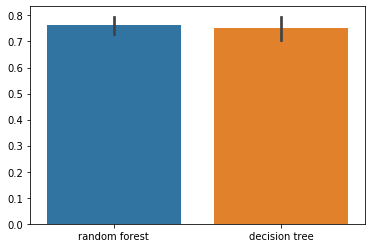

In [4]:
score_df = pd.DataFrame({'random forest': rf_scores, 'decision tree': dt_scores})
sns.barplot(data=score_df)